In [2]:
# data 가져오기
df_raw = pd.read_csv('../train.csv')

# 필요한 함수 정의

def isstr(col):
    if col.dtype == 'O':
        return True
    else:
        return False
    
# string type(정확히는 Object 타입) column만 가져오기

strcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]):
        strcol_name.append(i)
    i+=1
    
# SalePrice가 있는 col 포함 시켜주기 = 80번째
strcol_name.append(80)

# str 컬럼의 idx를 가져와서 str type col 만 df_str에 넣어줌.
df_str = df_raw.iloc[:, strcol_name]

# 숫자타입 column만 가져오기

numcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]) == False:
        numcol_name.append(i)
    i+=1

# 숫자타입 컬럼의 idx를 가져와서 숫자타입 col 만 df_num에 넣어줌.
df_num = df_raw.iloc[:, numcol_name]

In [3]:
df_num.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830,...,736,68,0,0,0,0,0,6,2008,147500


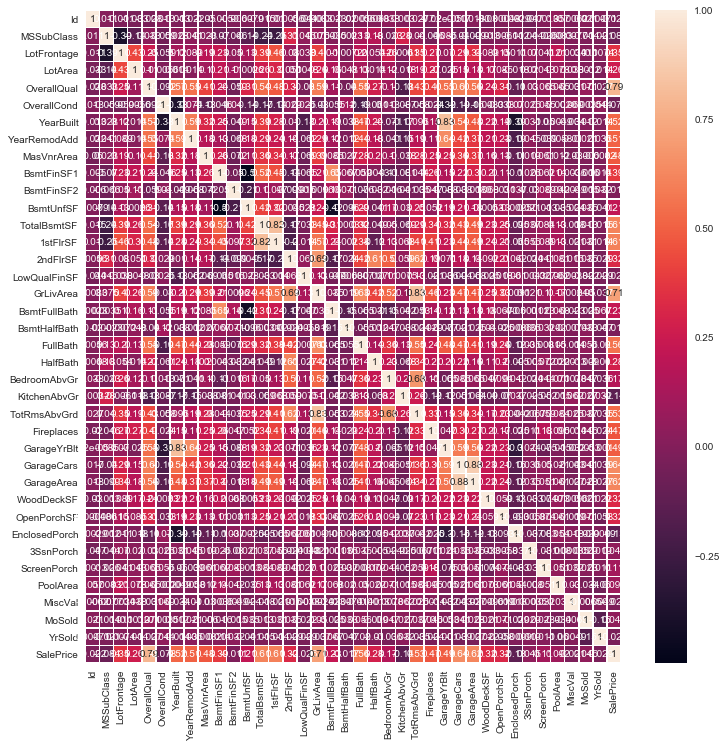

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

In [4]:
# 숫자 데이터에 대한 상관관계 확인
heat= df_num.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
plt.show()

# saleprice와의 상관관계만 보기. 내림차순으로. 상위 20개만
heat["SalePrice"].sort_values(ascending=False).head(20)

# 사용할 변수 선택

In [14]:
ls = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
#카테고리 넘버 제외
ls2 = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']
#상관계수 큰 항목 제외
ls3 = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']

X = df_num[ls]
X2 = df_num[ls2]
X3 = df_num[ls3]
X4 = df_num['GrLivArea']

y = pd.DataFrame(df_num['SalePrice'])

# 바이어스 오그멘테이션

In [15]:
import statsmodels.api as sm

X = sm.add_constant(X)
X2 = sm.add_constant(X2)
X3 = sm.add_constan7t(X3)
X4 = sm.add_constant(X4)

# OLS

In [10]:
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:19:54   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187   

In [13]:
model2 = sm.OLS(y,X2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     641.4
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:21:27   Log-Likelihood:                -17599.
No. Observations:                1460   AIC:                         3.521e+04
Df Residuals:                    1453   BIC:                         3.525e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.062e+06   1.18e+05    -17.548   

In [12]:
model3 = sm.OLS(y,X3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     904.2
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:20:48   Log-Likelihood:                -17632.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1455   BIC:                         3.530e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.369e+06   8.37e+04    -16.353      

In [16]:
model4 = sm.OLS(y,X4)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 06 Mar 2018   Prob (F-statistic):          4.52e-223
Time:                        12:22:43   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

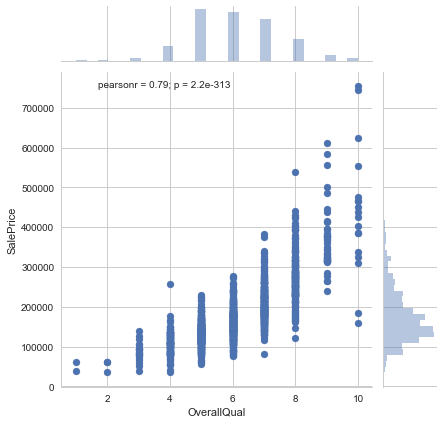

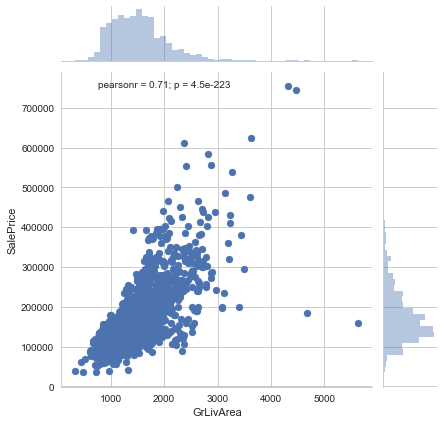

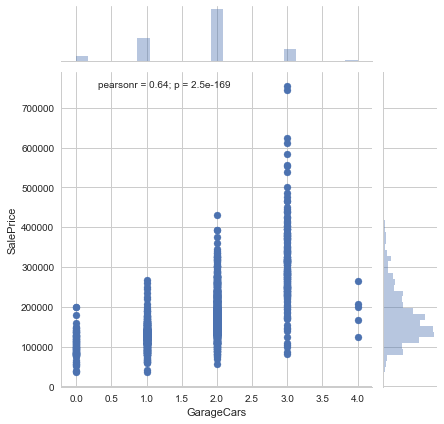

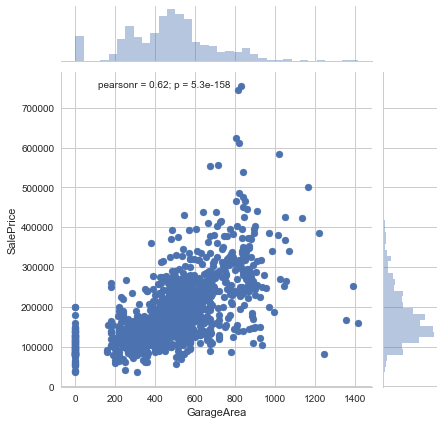

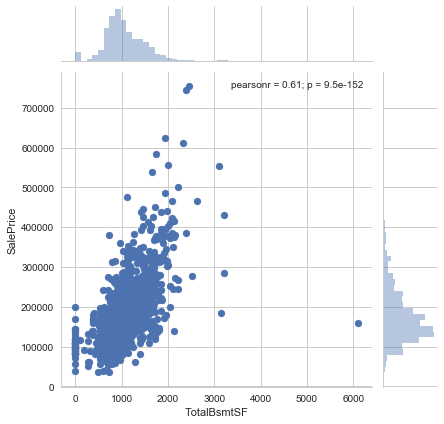

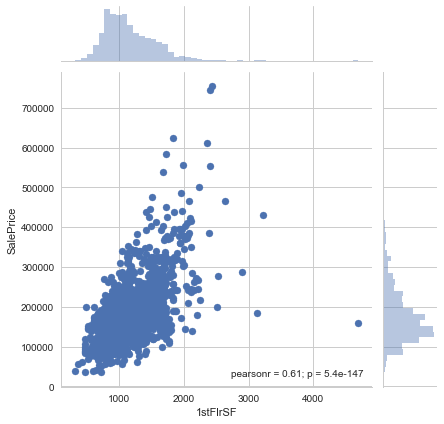

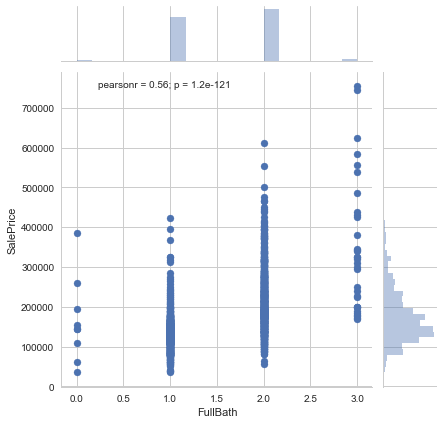

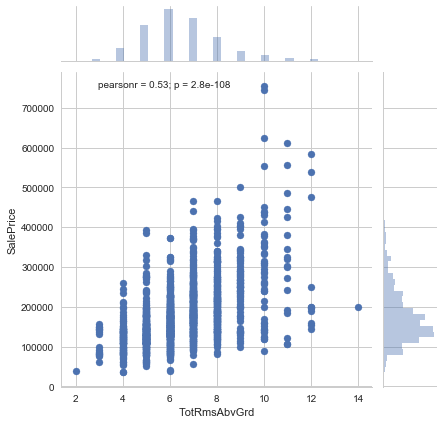

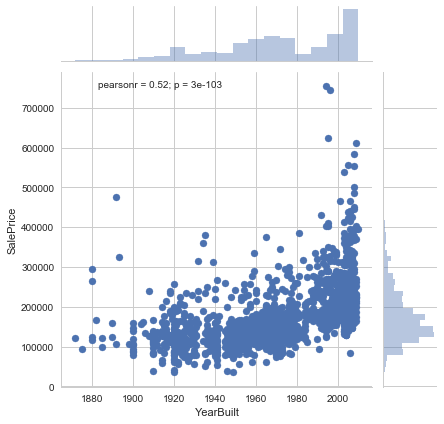

In [46]:
col_names = X.iloc[:,1:].columns
for col_name in col_names[:-1]:
    sns.jointplot(x=col_name, y="SalePrice", data=df_num)
    plt.show()

# 변수 간 상관계수

In [77]:
new = pd.concat([X.iloc[:,1:],y],axis=1)
new.tail()

,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,SalePrice
1455,1647,460,953,1999,175000
1456,2073,500,1542,1978,210000
1457,2340,252,1152,1941,266500
1458,1078,240,1078,1950,142125
1459,1256,276,1256,1965,147500


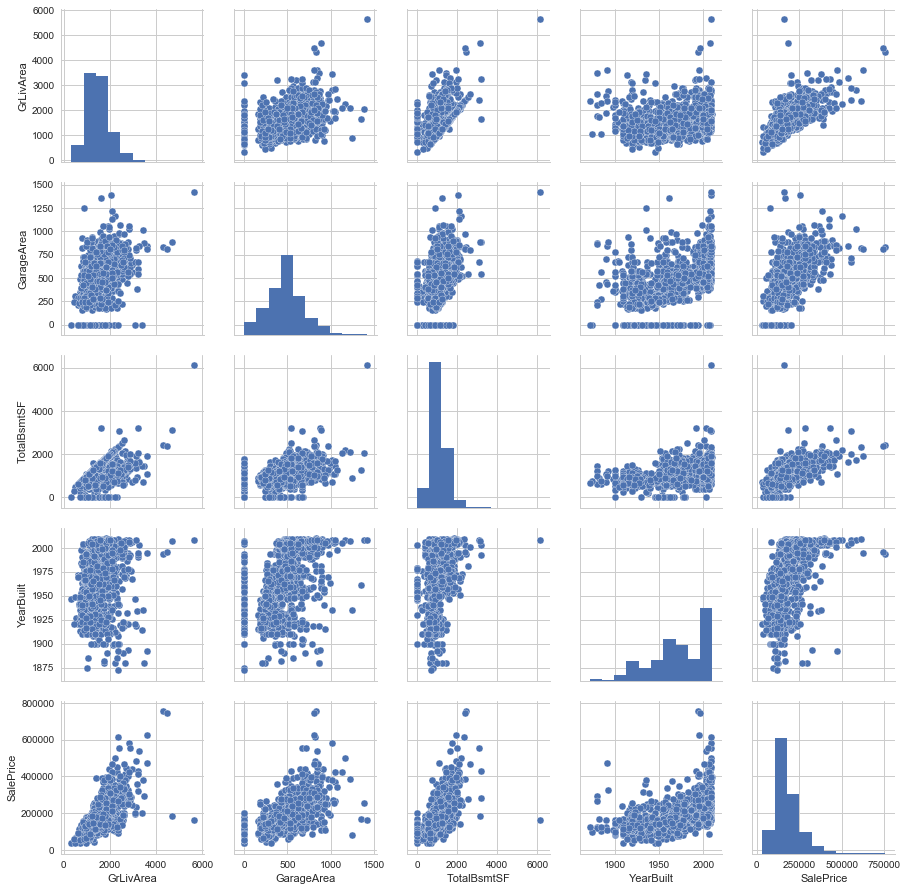

In [78]:
sns.pairplot(new, size = 2.5)

In [79]:
new.corr().iloc[:-1,:-1]

750000

,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt
GrLivArea,1.000000,0.468997,0.454868,0.199010
GarageArea,0.468997,1.000000,0.486665,0.478954
TotalBsmtSF,0.454868,0.486665,1.000000,0.391452
YearBuilt,0.199010,0.478954,0.391452,1.000000
